In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.utils import resample
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score


In [56]:
data = pd.read_csv('cardiac.csv')
data.head()


,caseno,age,weight,gender,fitness_score,cardiac_condition
0,1,37,70.47,Male,55.79,Absent
1,2,73,50.34,Female,35.00,Absent
2,3,46,87.65,Male,42.93,Present
3,4,36,89.80,Female,28.30,Present
4,5,34,103.02,Male,40.56,Absent


In [57]:
data.shape


(100, 6)

In [58]:
data.describe()

,caseno,age,weight,fitness_score
count,100.00,100.00,100.00,100.00
mean,50.50,41.10,79.66,43.63
std,29.01,9.14,15.09,8.57
min,1.00,30.00,50.00,27.35
25%,25.75,34.00,69.73,36.59
50%,50.50,39.00,79.24,42.73
75%,75.25,45.25,89.91,49.27
max,100.00,74.00,115.42,62.50


In [59]:
data.isna().sum().sort_values(ascending = False)


caseno               0
age                  0
weight               0
gender               0
fitness_score        0
cardiac_condition    0
dtype: int64

In [60]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender cardiac_condition
Numerical Features : caseno age weight fitness_score


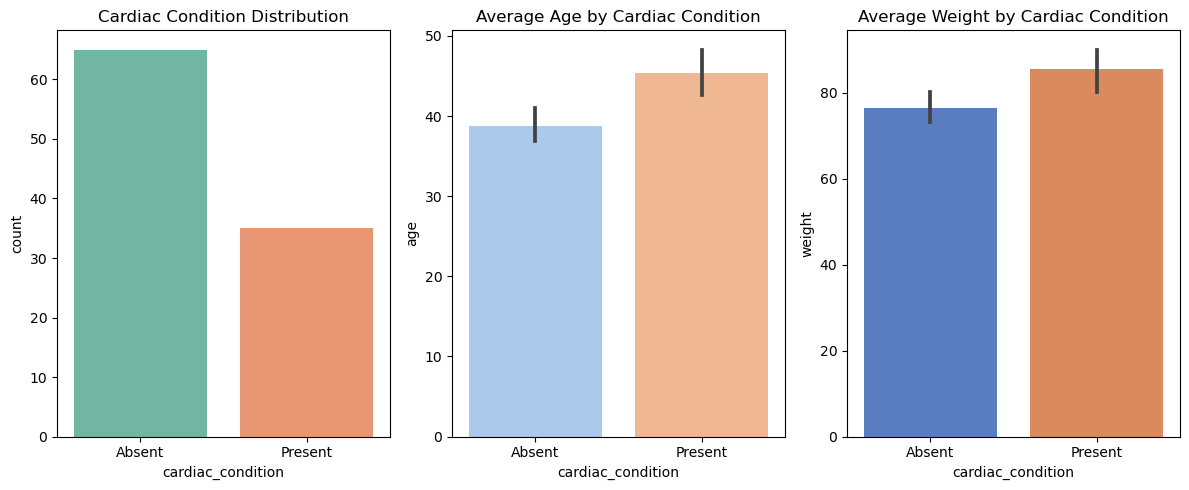

In [61]:

# Assuming 'cardiac_condition' is a categorical variable with different conditions

plt.figure(figsize=(12, 5))

# Bar plot for cardiac condition distribution
plt.subplot(1, 3, 1)
sns.countplot(x='cardiac_condition', data=data, palette='Set2')
plt.title('Cardiac Condition Distribution')

# Bar plot for average age by cardiac condition
plt.subplot(1, 3, 2)
sns.barplot(x='cardiac_condition', y='age', data=data, palette='pastel')
plt.title('Average Age by Cardiac Condition')

# Bar plot for average weight by cardiac condition
plt.subplot(1, 3, 3)
sns.barplot(x='cardiac_condition', y='weight', data=data, palette='muted')
plt.title('Average Weight by Cardiac Condition')

plt.tight_layout()
plt.show()


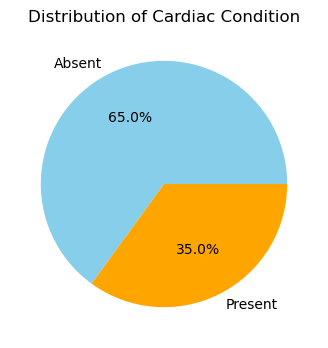

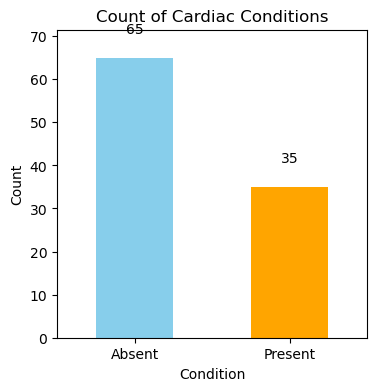

In [62]:
# Counting occurrences of each category in 'cardiac_condition'
condition_counts = data['cardiac_condition'].value_counts()

# Creating a pie chart
plt.figure(figsize=(6, 4))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', colors=['#87CEEB','#FFA500'])
plt.title('Distribution of Cardiac Condition')
plt.show()

colors = ['#87CEEB','#FFA500']
# Counting occurrences of each category in 'cardiac_condition'
condition_counts = data['cardiac_condition'].value_counts()

# Creating a bar plot with count annotations and adjusted y-axis limits
plt.figure(figsize=(4, 4))
ax = condition_counts.plot(kind='bar', color=['#87CEEB','#FFA500'])
plt.title('Count of Cardiac Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotating counts on top of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, height, ha='center', va='bottom')

# Adjusting y-axis limits to accommodate the annotation
plt.ylim(0, condition_counts.max() * 1.1)  # You can adjust the multiplier for more space

plt.show()


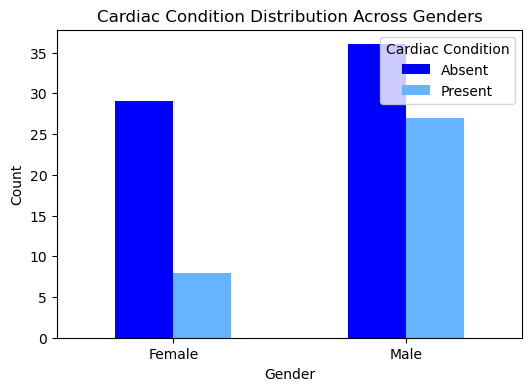

In [63]:
# Counting occurrences of cardiac conditions by gender
condition_by_gender = data.groupby(['gender', 'cardiac_condition']).size().unstack()

# Creating a grouped bar plot
condition_by_gender.plot(kind='bar', figsize=(6, 4), color=['#0000FF', '#66b3ff'])
plt.title('Cardiac Condition Distribution Across Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cardiac Condition', labels=['Absent', 'Present'])
plt.show()



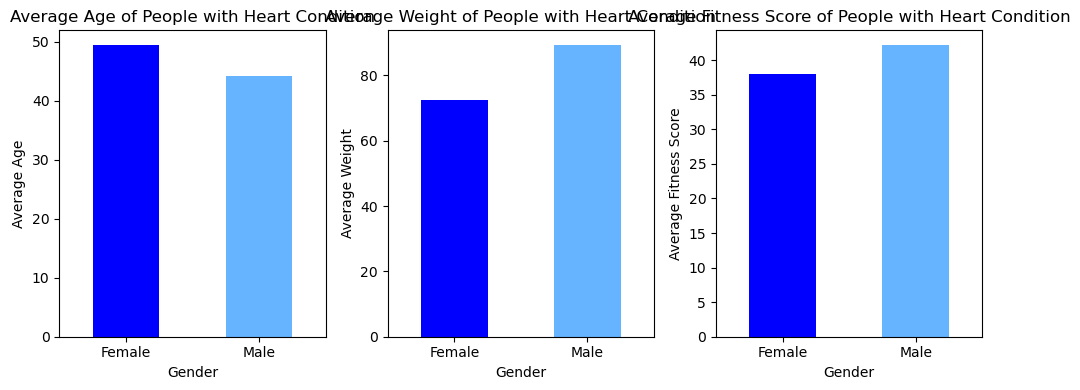

In [64]:
# Filtering data for individuals with a heart condition
heart_condition_data = data[data['cardiac_condition'] == 'Present']

# Calculating average age, weight, and fitness score by gender
avg_age_gender = heart_condition_data.groupby('gender')['age'].mean()
avg_weight_gender = heart_condition_data.groupby('gender')['weight'].mean()
avg_fitness_gender = heart_condition_data.groupby('gender')['fitness_score'].mean()

# Creating bar plots for average age, weight, and fitness score by gender
plt.figure(figsize=(10, 4))

# Average Age by Gender with Heart Condition
plt.subplot(1, 3, 1)
avg_age_gender.plot(kind='bar', color=['#0000FF', '#66b3ff'])
plt.title('Average Age of People with Heart Condition')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.xticks(rotation=0)

# Average Weight by Gender with Heart Condition
plt.subplot(1, 3, 2)
avg_weight_gender.plot(kind='bar', color=['#0000FF', '#66b3ff'])
plt.title('Average Weight of People with Heart Condition')
plt.xlabel('Gender')
plt.ylabel('Average Weight')
plt.xticks(rotation=0)

# Average Fitness Score by Gender with Heart Condition
plt.subplot(1, 3, 3)
avg_fitness_gender.plot(kind='bar', color=['#0000FF', '#66b3ff'])
plt.title('Average Fitness Score of People with Heart Condition')
plt.xlabel('Gender')
plt.ylabel('Average Fitness Score')
plt.xticks(rotation=0)

plt.subplots_adjust(wspace=2.0)
plt.tight_layout()
plt.show()


In [65]:
# data_encoded.head()

In [66]:
# Label encoding categorical features 
columns_to_encode = ['gender', 'cardiac_condition']

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Loop through the columns and apply label encoding
for col in columns_to_encode:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

In [67]:
data = data.drop(columns = columns_to_encode)

In [68]:
data.head()

,caseno,age,weight,fitness_score,gender_encoded,cardiac_condition_encoded
0,1,37,70.47,55.79,1,0
1,2,73,50.34,35.00,0,0
2,3,46,87.65,42.93,1,1
3,4,36,89.80,28.30,0,1
4,5,34,103.02,40.56,1,0


Text(0.5, 1.0, 'Fitness Score Distribution')

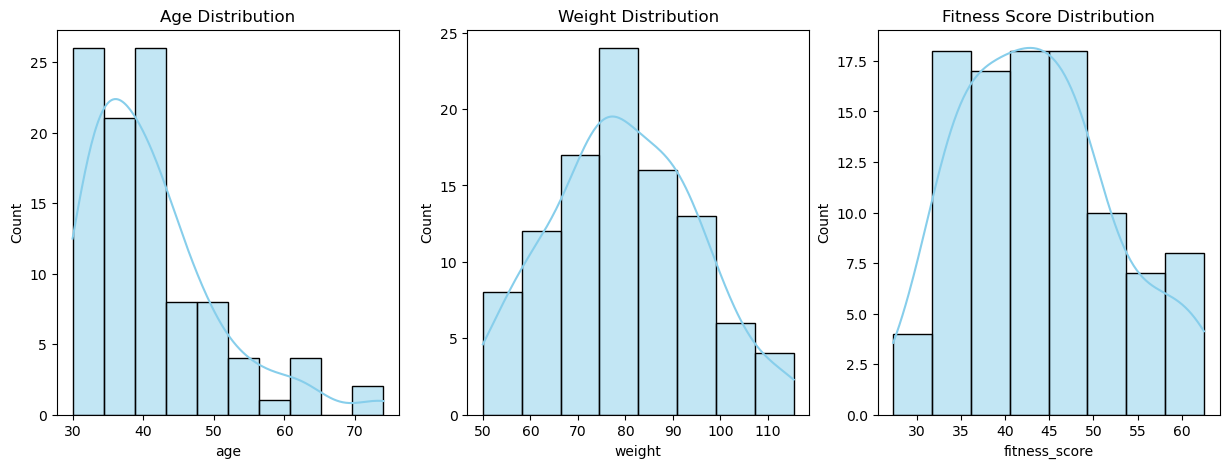

In [69]:
# Distribution plots for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['weight'], kde=True, color='skyblue')
plt.title('Weight Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['fitness_score'], kde=True, color='skyblue')
plt.title('Fitness Score Distribution')



##### didnt do log transformation because it is applying lot of tranformation on the age column and giving decimal values like 4.08

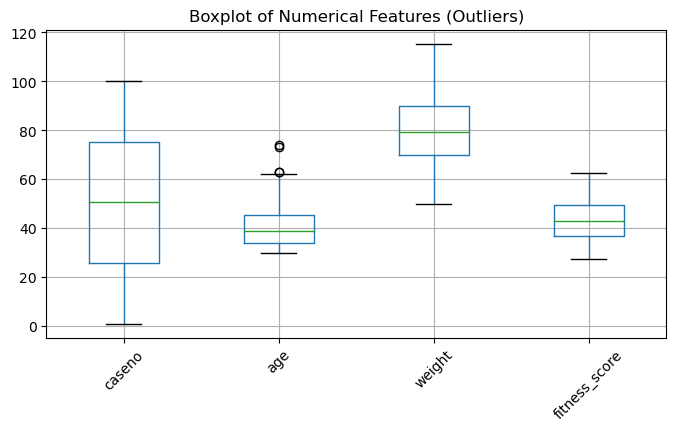

In [70]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create boxplots for each numerical feature to visualize outliers
plt.figure(figsize=(8, 4))
data[numerical_features].boxplot()
plt.title('Boxplot of Numerical Features (Outliers)')
plt.xticks(rotation=45)
plt.show()

# Detect outliers using descriptive statistics (e.g., using Interquartile Range - IQR)
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [71]:
int_cols = data.select_dtypes(include=['int64', 'float64', 'int32']).columns

#to calculate how many outliers each feature has 
for column in int_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # to identify outliers in the column
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # to display the number of outliers in each column
    print(f'Column: {column}, Number of Outliers: {len(outliers)}')

Column: caseno, Number of Outliers: 0
Column: age, Number of Outliers: 4
Column: weight, Number of Outliers: 0
Column: fitness_score, Number of Outliers: 0
Column: gender_encoded, Number of Outliers: 0
Column: cardiac_condition_encoded, Number of Outliers: 0


In [99]:
# Select the numerical columns for outlier removal
numerical_columns = ['age', 'weight', 'fitness_score']

# Calculate the quartiles (Q1 and Q3) for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where values are within the bounds for all numerical columns
data_no_outliers = data[((data[numerical_columns] >= lower_bound) & (data[numerical_columns] <= upper_bound)).all(axis=1)]



##### Scaling the data

In [73]:

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
data_normalized = scaler.fit_transform(data)

In [74]:
#computing Skewness and kurtosis of the features into a dataframe
skewness = data.skew()
kurtosis = data.kurt()

stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print(stats_df)

                           Skewness  Kurtosis
caseno                         0.00     -1.20
age                            1.44      2.24
weight                         0.13     -0.45
fitness_score                  0.42     -0.48
gender_encoded                -0.55     -1.74
cardiac_condition_encoded      0.64     -1.63


It seems that the outlier values are not too extreme, so we wont remove it 

<Figure size 800x600 with 0 Axes>

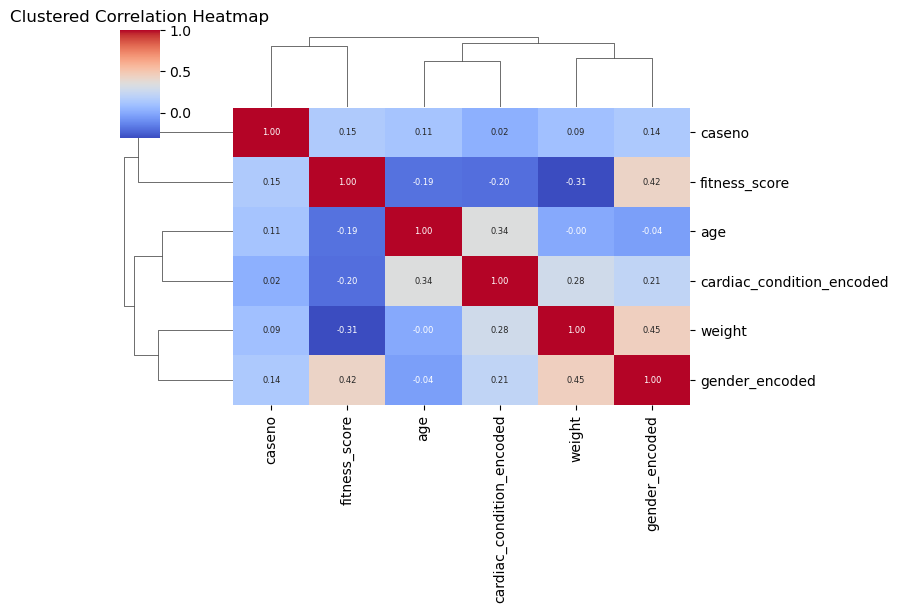

In [89]:
# Visualize correlation matrix using a clustered heatmap with reduced size
corr_matrix=data.corr()
plt.figure(figsize=(8, 6))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 6}, figsize=(8, 6))
plt.title('Clustered Correlation Heatmap')
plt.show()


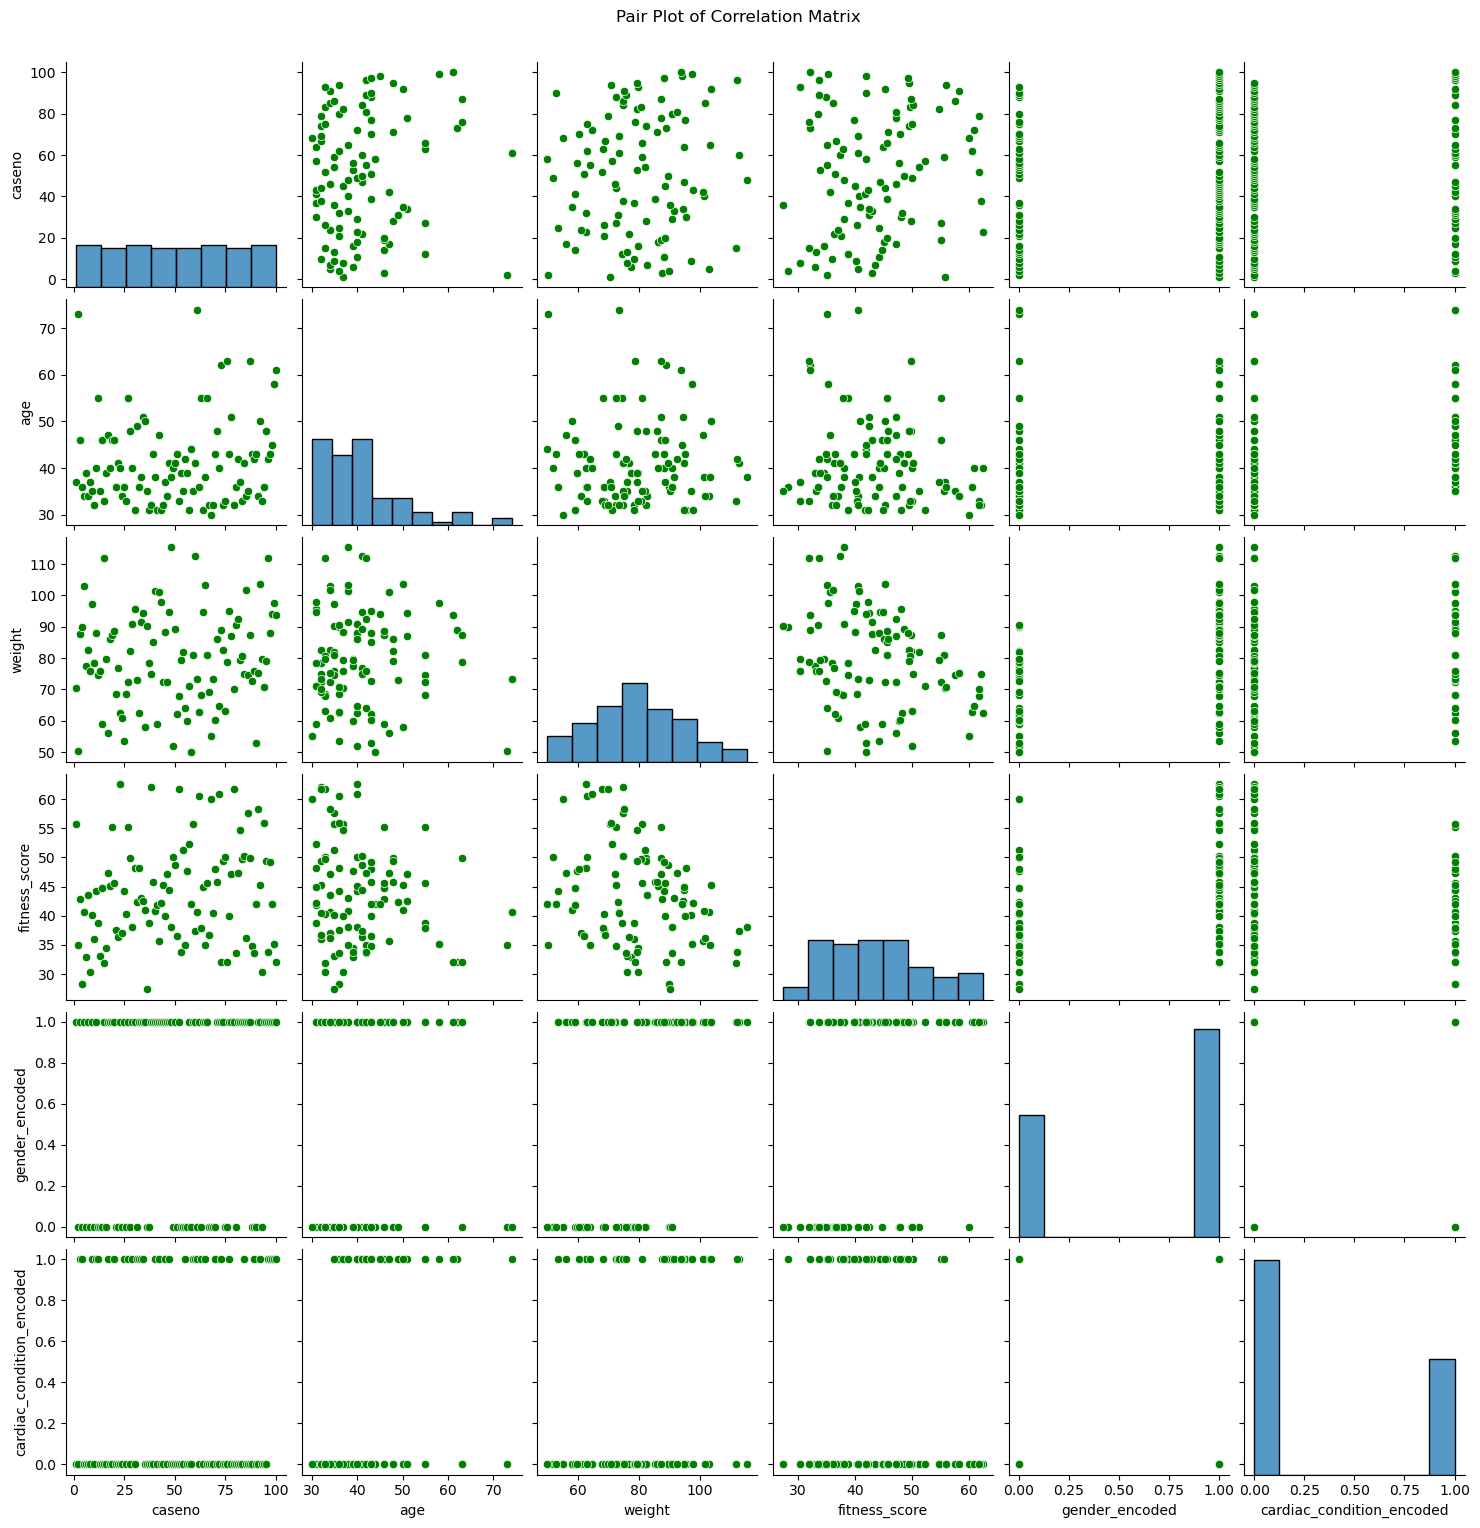

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation matrix using a pair plot with green color
sns.pairplot(data, palette='coolwarm', plot_kws={'color': 'green'})
plt.suptitle('Pair Plot of Correlation Matrix', y=1.02)
plt.show()


In [90]:
#displaying the features which are most and least correlated
print (corr_matrix['cardiac_condition_encoded'].sort_values(ascending=False)[:10]) #top 10 correlations


cardiac_condition_encoded    1.00
age                          0.34
weight                       0.28
gender_encoded               0.21
caseno                       0.02
fitness_score               -0.20
Name: cardiac_condition_encoded, dtype: float64


Downsampling

In [ ]:
# Assuming 'data' is your DataFrame and 'target_column' is the column to balance
# Separate the classes
class_0 = data[data['cardiac_condition_encoded'] == 0]  
class_1 = data[data['cardiac_condition_encoded'] == 1]  

# Downsample the majority class to match the minority class
class_0_downsampled = resample(class_0, replace=False, n_samples=len(class_1), random_state=42)

# Combine the downsampled majority class with the minority class
balanced_data = pd.concat([class_0_downsampled, class_1])

# Drop specific columns from the features
columns_to_drop = ['cardiac_condition_encoded', 'fitness_score', 'caseno']  # Add columns to drop here
X_balanced = balanced_data.drop(columns=columns_to_drop).values
y_balanced = balanced_data['cardiac_condition_encoded'].values

# Split the balanced dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.20, random_state=23138688)


In [ ]:
# Display the shapes of the train and test sets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

BASELINE MODEL

In [92]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

predictors = balanced_data[['gender_encoded', 'age', 'weight']]  

# Add a constant term for the intercept
predictors = sm.add_constant(predictors)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors.columns
vif_data['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display VIF values
print(vif_data)


         Variable   VIF
0           const 50.12
1  gender_encoded  1.38
2             age  1.01
3          weight  1.39


In [93]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent') 
dummy_classifier.fit(x_train, y_train) 
y_pred = dummy_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.4286


In [94]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from statsmodels.stats import diagnostic as diag


# Perform the Hosmer-Lemeshow Test
hl_test = diag.acorr_ljungbox(y_test - y_pred)
print("Hosmer-Lemeshow Test p-value:", hl_test)

# Compute Nagelkerke R Square (for dummy classifier, just the accuracy)
nagelkerke_r2 = accuracy
print("Nagelkerke R Square:", nagelkerke_r2)

# Compute AUC-ROC (for dummy classifier, it will be 0.5 as it predicts randomly)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)


Hosmer-Lemeshow Test p-value:    lb_stat  lb_pvalue
1     0.02       0.90
2     0.69       0.71
Nagelkerke R Square: 0.42857142857142855
AUC-ROC: 0.5


Logistic Regression Model

In [86]:
LR_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    LogisticRegression()
)
LR_model.fit(x_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [95]:
# get predictions for training and testing data
y_training_pred = LR_model.predict(x_train)
y_testing_pred = LR_model.predict(x_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.7143
Testing accuracy :  0.7143


In [97]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from statsmodels.stats import diagnostic as diag


# Perform the Hosmer-Lemeshow Test
hl_test = diag.acorr_ljungbox(y_test - y_pred)
print("Hosmer-Lemeshow Test p-value:", hl_test)

# Compute Nagelkerke R Square (for dummy classifier, just the accuracy)
nagelkerke_r2 = accuracy
print("Nagelkerke R Square:", nagelkerke_r2)

# Compute AUC-ROC (for dummy classifier, it will be 0.5 as it predicts randomly)
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)




Hosmer-Lemeshow Test p-value:    lb_stat  lb_pvalue
1     0.02       0.90
2     0.69       0.71
Nagelkerke R Square: 0.42857142857142855
AUC-ROC: 0.5


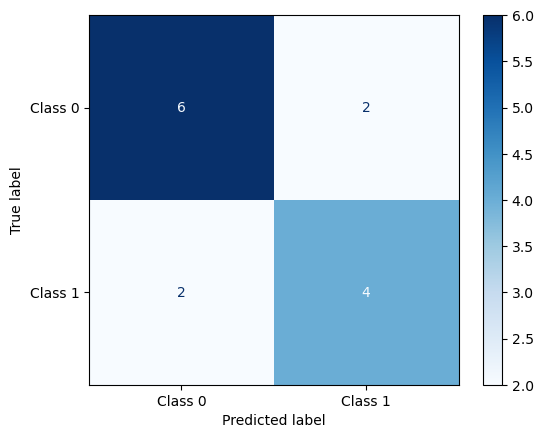

<Figure size 800x600 with 0 Axes>

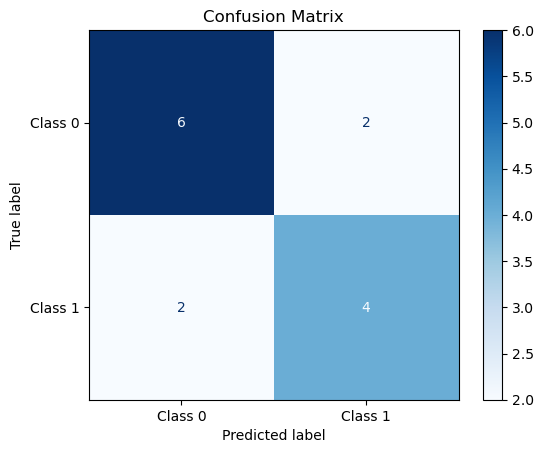

In [81]:
# Sample data (replace with your actual data)
# x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# LR_model = LogisticRegression()
# LR_model.fit(x_train, y_train)

# Predictions on the test set
y_pred = LR_model.predict(x_test)

# Create ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(LR_model, x_test, y_test, display_labels=['Class 0', 'Class 1'], cmap='Blues')

# Plot the confusion matrix with a specific color map
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [82]:
print(classification_report(y_test , LR_model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.67      0.67      0.67         6

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14



ROC AUC Score: 0.7708


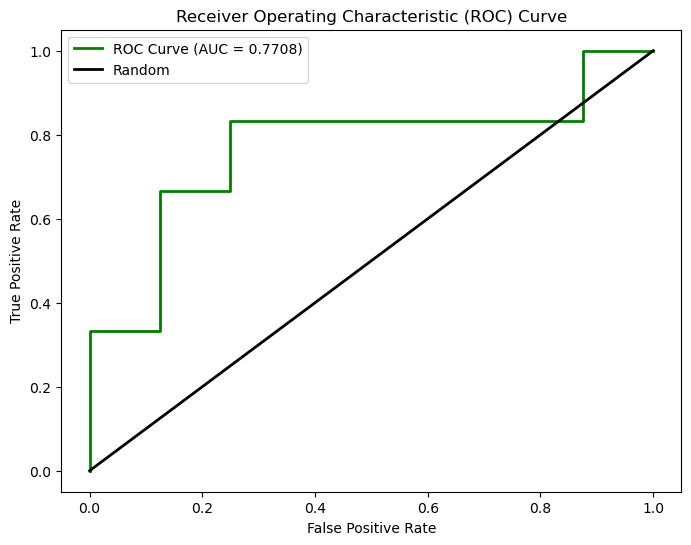

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_proba = LR_model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print ROC AUC score
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC Curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='-', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
